In [3]:
import tensorflow
from tensorflow.python.client import device_lib

In [4]:
dir(tensorflow)

['AggregationMethod',
 'Assert',
 'CriticalSection',
 'DType',
 'DeviceSpec',
 'GradientTape',
 'Graph',
 'IndexedSlices',
 'IndexedSlicesSpec',
 'Module',
 'Operation',
 'OptionalSpec',
 'RaggedTensor',
 'RaggedTensorSpec',
 'RegisterGradient',
 'SparseTensor',
 'SparseTensorSpec',
 'Tensor',
 'TensorArray',
 'TensorArraySpec',
 'TensorShape',
 'TensorSpec',
 'TypeSpec',
 'UnconnectedGradients',
 'Variable',
 'VariableAggregation',
 'VariableSynchronization',
 '_LazyLoader',
 '__builtins__',
 '__cached__',
 '__compiler_version__',
 '__cxx11_abi_flag__',
 '__doc__',
 '__file__',
 '__git_version__',
 '__loader__',
 '__monolithic_build__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_absolute_import',
 '_api',
 '_division',
 '_forward_module',
 '_importlib',
 '_m',
 '_print_function',
 '_root_estimator',
 '_sys',
 '_top_level_modules',
 '_types',
 'abs',
 'acos',
 'acosh',
 'add',
 'add_n',
 'argmax',
 'argmin',
 'argsort',
 'as_dtype',
 'as_string',
 'asin',

 - manifold leaning
 - sparse autoencoder: 차원을 줄이지 않고 늘렸다가 줄이는 것.
 - 핵심은 오토인코더는 앞뒤가 똑같다는 것이다.
 - PCA하고 auto encoder랑 같이 못 쓴다. 뉴럴네트워크 기반 모델에 쓰여서, end-to-end 모델에 쓰인다.
 
오토인코더의 최고의 문제점은 그림이 너무 희미하게 나온다는 것이다. 희미한 특성 때문에, gan을 더 많이 쓰는 이유다.

---

logistic regression vs naive bayes -> 기계학습 하는 사람들은 반드시 읽어봐야 하는 모델. no free lunch을 배울 때, 제일 먼저 배우는 것이 로지스틱 리그레션과 나이브 베이즈 등등을 베운다. 뭐 각설하고, 판별모델 vs 생성모델로도 분류할 수 있는데, 일반적인 판별모델이 뉴럴 네트워크이고 생성모델은 갠과 오토인코더 계열이다. 그런데 분포를 찾을 때는 싹 다 확률 기반으로 찾는다. 확률은 또 2가지 기반으로 나뉘는데, 과거기반으로 찾는 베이지안 확률과 숫자만 가지고 노는 애들이다.

 - ml 방식: 남자에게 머리카락이 나올 확률 / 여자에게 머리카락이 나올 확률을 나와서 그것만 비교하는 것이다.
 - MAP: 머리카락이 발견됬을 때, 남자인 확률, 여자인 확률을 구하는 것이다. 직접 구하기 어려워서 간접적으로 베이지안 룰을 이용해서 구한다. 
 
https://www.tensorflow.org/probability?hl=ko

연산복잡도를 만드는 방법 중의 하나이다. 위의 사이트에 관심을 가지면 망한다. 선생님 말 듣자... 암튼 뭐 manifold라는 것은 차원을 축소시켜도 고차원에서 있는 특성들이 살아있다는 것이다. 그러면 latent 변수 (숨어있는 변수) 만 잘 찾으면, 차원에 상관없이 결과를 잘 만들어낼 수 있다. varaitional autoencoder는 평균과 표준편차 개념이 들어간다. 그래서 정규화가 인코더와 디코더에 들어가게 된다. 이 가운데 있는 레이어를 이용해서, 새로운 결과를 창출할 수 있다. 이 녀석을 이용해서 새로운 분포를 찾아내서, 그 분포에 따른 결과를 생성한다. 대부분 정규분포를 가정한다. 복잡한 분포는 대부분 정규분포를 따를 수 있기 때문. 

여담이지만, 디코더를 갠으로 바꿀 수도 있다. 그런데 갠은 학습이 안되는 단점이 있다. 애초에 체리피킹 논문이라고 발표를 했다. 그래서 나중에 나온 논문들은 갠을 어떻게 잘 학습시킬 것이냐라는 문제를 다룬다. 다시 본론으로 돌아와서, 분포를 찾아야 하는데 결국 이건 추정이다. 정확하게 찾는 방식이 있고, 대충 추정하는 방식이 있다. variational 방식은 정확하게 찾으려는 계열 중에서, 좀 대충 찾는 방식이다. 다시 말하면, 모델을 가정하고 (우리의 경우는 정규분포) 이 가정을 정확하게는 찾지 못하고, 근사치를 이용해서 대충찾는 방법이다. 대충찾는게 마코프 체인인데, 몰라도 된다. 갠도 모델을 안 만든다.

컴퓨터 사이언스의 관점은 새로운 것들 받고, 성능만 좋으면 장땡이다. 나도 계속 이 분야로 나가려면 아마 이 관점을 따라야 할 것이다. 지금 은근히 잘 나가는 걸지도?? 

# keras blog auto encoder

https://blog.keras.io/building-autoencoders-in-keras.html

역사적으로 항상 풀리 커넥티드가 성공하면, 컨볼루션데 도전한다. 갠도 마찬가지다. 풀리 커넥티드한 오토 인코더와 비교했을 때, 훨씬 더 깔끔하게 결과가 나온다. 흐리지 않고 말이다.

# denoising

노이즈는 고유한 특성이 아니다. 이 것을 제거하는 것이다.

In [7]:
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [8]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [9]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

노이즈 값을 더해서, 랜덤으로 노이즈를 생성하는 방식이다. 그 뒤에 클립을 이용해서 0부터 1가지의 값으로 잘라주었는데 이렇게 하는 이유는 뉴럴네트워크에서 좋은 성능을 주기 때문이다. 포토샵에서도 이런게 있는데, 평균을 내서 이미지를 조금 흐려지게 만든다. 여기까지는 그냥 데이터 만드는 부분이니까 크게 신경쓰지 마라.

w, b는 오버피팅 시켜도 된다.

In [10]:
import matplotlib.pyplot as plt

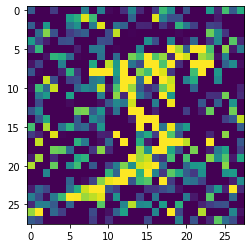

In [16]:
x_train_noisy.shape
plt.imshow(x_train_noisy[0].reshape(28, 28))

In [66]:
from tensorflow.keras.layers import Conv2D, Input, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

In [67]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')

In [68]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1619 - val_loss: 0.1163
Epoch 2/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1133 - val_loss: 0.1084
Epoch 3/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1078 - val_loss: 0.1051
Epoch 4/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1051 - val_loss: 0.1028
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1032 - val_loss: 0.1017
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1019 - val_loss: 0.1003
Epoch 7/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1008 - val_loss: 0.0994
Epoch 8/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1000 - val_loss: 0.0990
Epoch 9/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0994 - val_

In [69]:
a = autoencoder.predict(x_train_noisy[0:10])

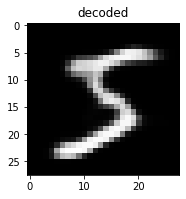

In [77]:
plt.subplot(1, 2, 2)
plt.imshow(x_train_noisy[0].reshape(28, 28), cmap = 'gray')
plt.title('origin')
plt.imshow(a[0].reshape(28, 28), cmap = 'gray')
plt.title('decoded')
plt.show()

잘 안 나타나는 중요한 특징은 사라질 수도 있다. 얘는 손실 압축 개념이기 때문에 노이즈를 없앨 수 있다. 점들이 다른 형태로 나올 수 있다. 

# Add, Average, Concatenate, Dot

샹

In [119]:
from tensorflow.keras.layers import Dense, Add, Input, Average, Concatenate, Dot
from tensorflow.keras.models import Sequential, Model

In [94]:
model = Model()

In [112]:
input1 = Input(shape = (2, 2))

x1 = Dense(2, activation='relu', kernel_initializer='ones')(input1)
x2 = Dense(2, activation='relu', kernel_initializer='ones')(input1)

In [125]:
layer3 = Average()([x1, x2])
layer4 = Concatenate()([x1, x2])
layer5 = Dot(axes =2)([x1, x2])

In [126]:
mo = Model(input1, layer3)
con = Model(input1, layer4)
dot = Model(input1, layer5)

In [115]:
x = np.array([[1, 2], [3, 4]])
x = x[np.newaxis]

In [117]:
x.shape

(1, 2, 2)

In [118]:
mo.predict(x)

array([[[3., 3.],
        [7., 7.]]], dtype=float32)

In [129]:
a = con.predict(x)
a.shape

(1, 2, 4)

In [131]:
a

array([[[3., 3., 3., 3.],
        [7., 7., 7., 7.]]], dtype=float32)

In [128]:
dot.predict(x)

array([[[18., 42.],
        [42., 98.]]], dtype=float32)

Concatenate에서 추가될 때, 행개념으로 추가될까 열 개념으로 추가될까? 기본적으로 열 개념으로 추가된다. 행렬 연산이 가능하려면, 행은 고정되어 있지만, 열은 알아서 자동적으로 계산을 해주는데, 그래서 열 개념이 좀 더 유연하다.

람다 레이어는 한 번 쓰면 사라져 버린다. 함수를 인자로 받아서, 앞의 레이어의 값을 변화시켜주는게 람다이다. 람다 레이어는 지가 함수를 받아서, 앞에서 받은 결과값을 이 함수를 실행해서 다음 레이어에 던져누는 것이다. ★★★ 다양한 연산을 이 람다를 통해서 던져줄 수 있다.

람다의 아웃풋 레이어에 아웃풋 옵션이 있는데, 이건 안해줘도 된다. 왜냐면 텐서플로 기반은 알아서 맞춰주기 때문이다. 다른 프레임워크는 이걸 맞춰줘야 하기 때문에 굳이 코딩에 output을 넣어두었다.

### 리 파라미터라이즈 테크닉

In [232]:
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras.models import Sequential, Model
import tensorflow.keras.backend as K

In [250]:
batch_size = 16
intermediate_dim = 32
latent_dim = 16
original_dim = 784
epsilon_std = 1
epochs = 5

In [251]:
x = Input(batch_shape=(batch_size, original_dim))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

In [252]:
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim),
                              mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_sigma) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
# so you could write `Lambda(sampling)([z_mean, z_log_sigma])`
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])

In [253]:
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

In [261]:
# end-to-end autoencoder
vae = Model(x, x_decoded_mean)

# encoder, from inputs to latent space
encoder = Model(x, z_mean)

# generator, from latent space to reconstructed inputs
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
Add()
generator = Model(decoder_input, _x_decoded_mean, output = 2)

TypeError: ('Functional models may only specify `name` and `trainable` keyword arguments during initialization. Got an unexpected argument:', 'output')

In [255]:
vae.summary()

Model: "model_43"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_39 (InputLayer)           [(16, 784)]          0                                            
__________________________________________________________________________________________________
dense_52 (Dense)                (16, 32)             25120       input_39[0][0]                   
__________________________________________________________________________________________________
dense_53 (Dense)                (16, 16)             528         dense_52[0][0]                   
__________________________________________________________________________________________________
dense_54 (Dense)                (16, 16)             528         dense_52[0][0]                   
___________________________________________________________________________________________

In [256]:
encoder.summary()

Model: "model_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        [(16, 784)]               0         
_________________________________________________________________
dense_52 (Dense)             (16, 32)                  25120     
_________________________________________________________________
dense_53 (Dense)             (16, 16)                  528       
Total params: 25,648
Trainable params: 25,648
Non-trainable params: 0
_________________________________________________________________


In [257]:
generator.summary() # 디코더 부분을 제너레이터라고 부른다. 이제.

Model: "model_45"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_40 (InputLayer)           [(None, 16)]         0                                            
__________________________________________________________________________________________________
dense_55 (Dense)                multiple             544         input_40[0][0]                   
__________________________________________________________________________________________________
dense_56 (Dense)                multiple             25872       dense_55[1][0]                   
__________________________________________________________________________________________________
add_12 (Add)                    (None, 784)          0           dense_56[1][0]                   
                                                                 dense_56[1][0]            

In [258]:
from tensorflow.keras.losses import binary_crossentropy

In [259]:
# 다중로스써서 동시에 줄이는 것. 또한 함수를 loss에 넘겨주었다.
def vae_loss(x, x_decoded_mean):
    xent_loss = binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return xent_loss + kl_loss # 리턴값 1개로 만들 수 있다.

vae.compile(optimizer='adam', loss=[vae_loss1, vae_loss2],
           experimental_run_tf_function=False)

ValueError: When passing a list as loss, it should have one entry per model outputs. The model has 1 outputs, but you passed loss=[<function vae_loss1 at 0x0000018F68A0EDC8>, <function vae_loss2 at 0x0000018F68A0EA68>]

In [ ]:
def vae_loss1(x, x_decoded_mean):
    xent_loss = binary_crossentropy(x, x_decoded_mean)
    return xent_loss

def vae_loss2():
    kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return kl_loss

In [ ]:
x_train.shape

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, x_test))

In [219]:
x_train[0].reshape(1, -1)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [225]:
a = vae.predict(x_train[0:16].reshape(16, -1))

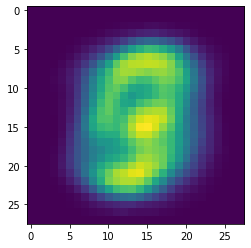

In [227]:
plt.imshow(a[0].reshape(28, 28))

우리는 샘플링하는걸 선형 결합으로 쓸것이다. 이래도 상관없는 이유는 어차피 결과만 좋으면 장땡이긴 때문.

In [262]:
model = Sequential()
Conv1 = Conv2D(32, (3, 3), input_shape = (28, 28, 1),
               use_bias=False,
               kernel_initializer = 'ones')
model.add(Conv1)

In [263]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
kernel_initializer